<a href="https://colab.research.google.com/github/namoshi/mathAI/blob/master/func_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization

関数
\begin{align*}
  f(x) = (x-2)^2(x+3)(x+1) = x^4 + 7x^3 + 5x^2 - 17 x + 3
\end{align*}
の最小値を求める問題を考える．

まずは，この関数のグラフを描いてみます．
グラフからもわかるように，この関数は，

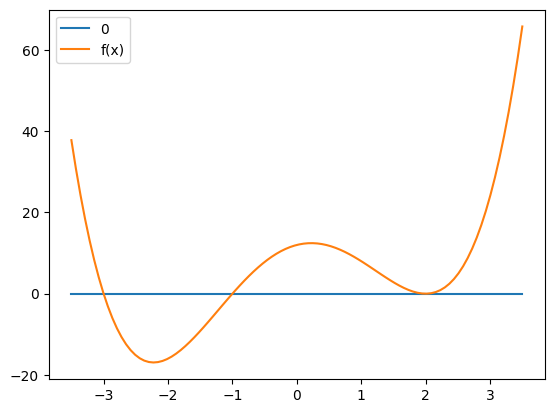

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective Function
def f(x):
  return np.power(x, 4) - 9.0 * np.power(x, 2) + 4.0 * x + 12.0

# First order derivative of f(x)
def df(x):
  return 4.0 * np.power(x, 3) - 18.0 * x + 4.0

# Second order derivative of f(x)
def ddf(x):
  return 12.0 * np.power(x, 2) - 18.0

# Plot the function f(x)
x = np.linspace(-3.5, 3.5, 100)

zero = np.zeros(len(x))
y = f(x)

plt.plot(x, zero, label='0')

plt.plot(x, y, label='f(x)')

plt.legend()

plt.show()

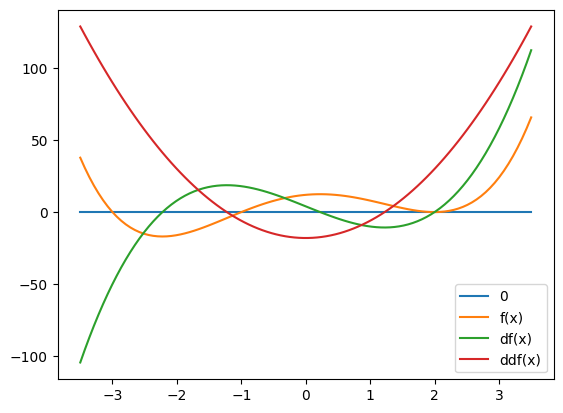

In [8]:
# Plot the function f(x), the first and the second derivatives of f(x)
x = np.linspace(-3.5, 3.5, 100)

zero = np.zeros(len(x))
y = f(x)
dy = df(x)
ddy = ddf(x)

plt.plot(x, zero, label='0')

plt.plot(x, y, label='f(x)')

plt.plot(x, dy, label='df(x)')

plt.plot(x, ddy, label='ddf(x)')

plt.legend()

plt.show()

このグラフから関数$f(x)$は，-2付近に最小値(Global Minima)を持ち，2付近にも局所的な最小値(Local Minima)があることがわかる．

計算してみると，$x = -1 - \sqrt{\frac{3}{2}}$で最小値$-\frac{9}{4}-6\sqrt{6}$を持つことがわかる．
これが，$f(x)$の微分$df$のグラフ（緑の線）が$x = -1 - \sqrt{\frac{3}{2}}$で0となり，それより左側では負の値をとり，右側では正の値をとっている．つまり，$x$が$x = -1 - \sqrt{\frac{3}{2}}$より小さい領域では値が減少し，それより大きい領域では，値が増加することがわかる．

$x=2.0$で同様の傾向にあるが，ここでの関数の値は，0であり，最小値よりも大きな値となっている．

一方，$x = -1 + \sqrt{\frac{3}{2}}$でも微分が0となるが，逆の傾向となり局所的な最大値となっている．

最小値となっているか最大値となっているかは，2階微分（赤の線）の値を見ればわかる．$x = -1 - \sqrt{\frac{3}{2}}$，および，$x=2.0$がでは，2階微分の値は正となっており，微分が負から正に変化し，逆に，$x = -1 + \sqrt{\frac{3}{2}}$では，2階微分が負となっており，微分が制から負になっている．

In [ ]:
print(df(-1.0+np.sqrt(3.0/2.0)))
print(df(-1.0-np.sqrt(3.0/2.0)))
print(df(2.0))

1.7763568394002505e-15
7.105427357601002e-15
0.0


# Stochastic Gradient Decent



epoch 10, theta: -2.224745


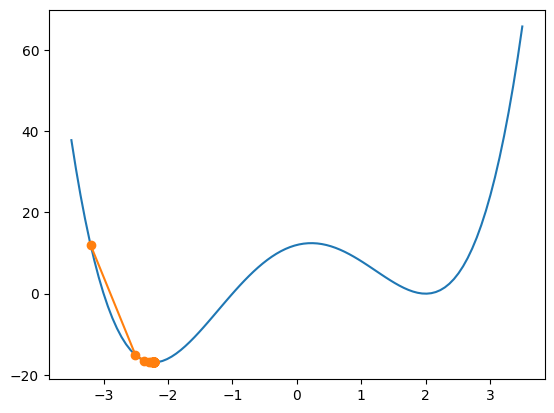

In [10]:
import torch

def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    plt.plot(x, y, label='f(x)')
    xxx = np.zeros(len(results))
    yyy = np.zeros(len(results))
    for i, xx in enumerate(results):
      xxx[i] = xx
      yyy[i] = f(xx)
    plt.plot(xxx, yyy, '-o')
    plt.show()

# Gradient Decent Loop
nepoch = 50
eta = 0.01
theta = -3.2  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= eta * df(theta)  # Update
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)

epoch 10, theta: 2.000000


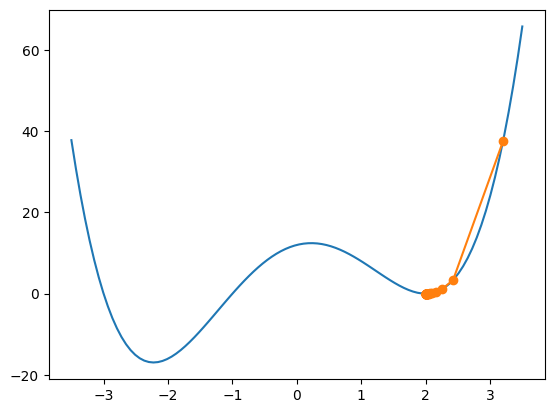

In [12]:
# Gradient Decent Loop
theta = 3.2  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= eta * df(theta)  # Update
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)


epoch 10, theta: -2.224737


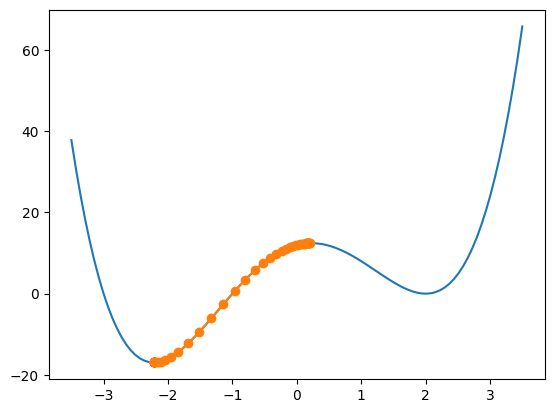

In [13]:
# Gradient Decent Loop
theta = 0.2  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= eta * df(theta)  # Update
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)

epoch 10, theta: 1.999999


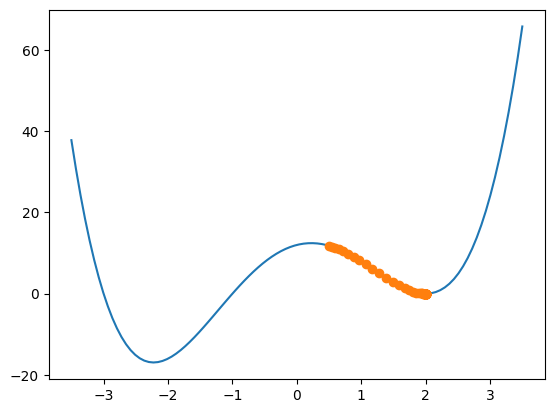

In [14]:
# Gradient Decent Loop
theta = 0.5  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= eta * df(theta)  # Update
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)

# ニュートン法

### $f(x)$のテーラー展開

\begin{align*}
  f(x_t + \delta) \approx f(x_t) + f'(x_t) \delta + \frac{1}{2} f''(x_t) \delta^2
\end{align*}

最適な更新量$\delta$を求めるため，これを，$\delta$で微分して$0$と置く．
\begin{align*}
  f'(x_t) + f''(x_t) \delta = 0
\end{align*}
これから，
\begin{align*}
  \delta = - \frac{f'(x_t)}{f''(x_t)}
\end{align*}

したがって，ニュートン法の更新式は，
\begin{align*}
  x \Leftarrow x - \frac{f'(x_t)}{f''(x_t)}
\end{align*}

epoch 10, theta: -2.224745


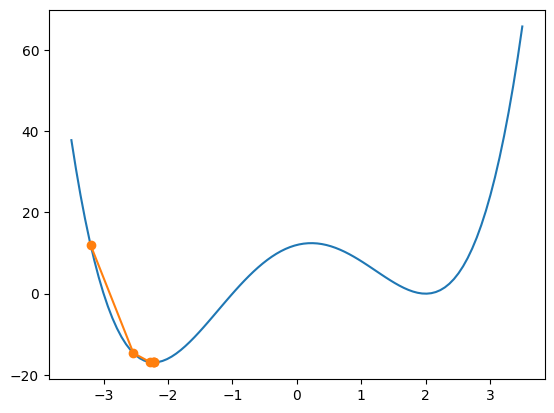

In [15]:
# Newton's Method
nepoch = 5
theta = -3.2  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= df(theta) / ddf(theta)  # Update Rule of Neuton's Method
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)

epoch 10, theta: 2.000000


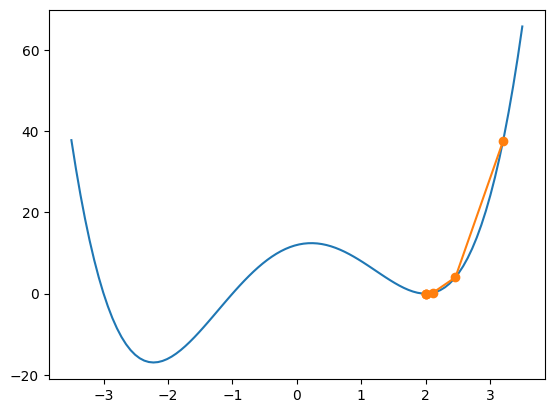

In [16]:
# Newton's Method
nepoch = 5
theta = 3.2  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= df(theta) / ddf(theta)  # Update Rule of Neuton's Method
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)

epoch 10, theta: 2.000000


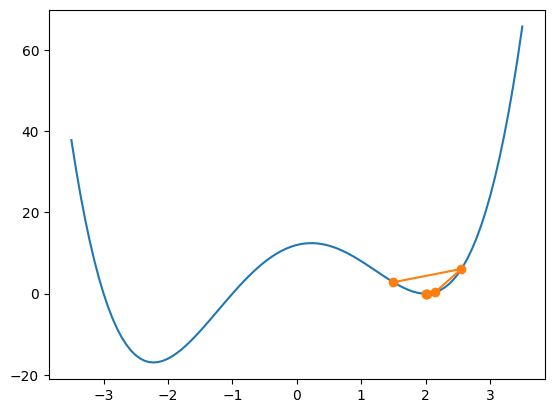

In [19]:
# Newton's Method
nepoch = 5
theta = 1.5  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= df(theta) / ddf(theta)  # Update Rule of Neuton's Method
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)

## 注意
ニュートン法は，２次微分が負になると破綻する！

epoch 10, theta: 0.224745


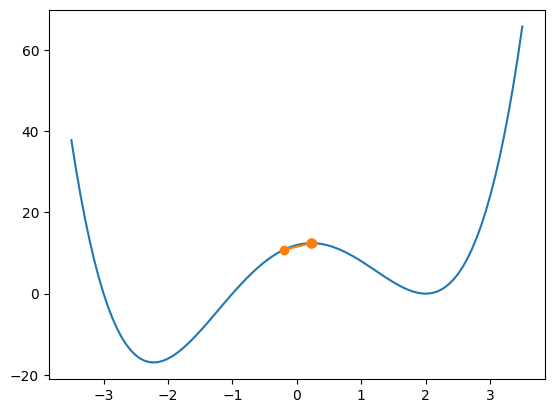

In [20]:
# Newton's Method
nepoch = 5
theta = -0.2  # initial value of x
results = [theta]
for i in range(nepoch):
    theta -= df(theta) / ddf(theta)  # Update Rule of Neuton's Method
    results.append(float(theta))
print(f'epoch 10, theta: {theta:f}')

# Plot Results
#print(results)
show_trace(results, f)

# 多次元の場合

2変数の関数
\begin{align*}
 f(x, y) = x^2 + 2  y^2
\end{align*}
の最小値を最急降下法で求める．

勾配は，
\begin{align*}
  \frac{\partial f}{\partial \bf x} = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}
  = \begin{bmatrix} 2 x \\ 4 y \end{bmatrix}
\end{align*}
となるので，最急降下法による更新式は，
\begin{align*}
  {\bf x}_{t+1} \leftarrow {\bf x}_{t} + \eta \begin{bmatrix} 2 x_t \\ 4 y_t \end{bmatrix}
\end{align*}
のようになる．ここで，$\eta$は，学習係数である．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
def show_trace_2d(f, results):
    """Show the trace of 2D variables during optimization."""
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 5.0, 0.1), torch.arange(-4.0, 5.0, 0.1), indexing='ij')
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.savefig('2D_GD.png')
    plt.show()

epoch 20, x1: -0.057646, x2: -0.000073


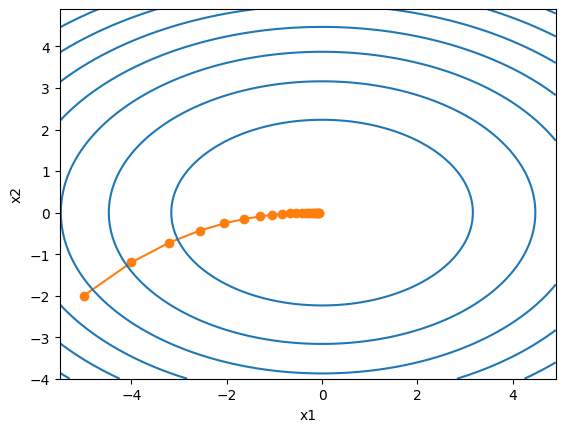

In [ ]:
def f_2d(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

# Gradient Decent Update
def gd_2d(x1, x2, eta):
    g1, g2 = f_2d_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2)


eta = 0.1
steps=20
x1, x2 = -5, -2
results = [(x1, x2)]
for i in range(steps):
  x1, x2 = gd_2d(x1, x2, eta)
  results.append((x1, x2))
print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')

show_trace_2d(f_2d, results)

epoch 20, x1: 0.034588, x2: 0.000073


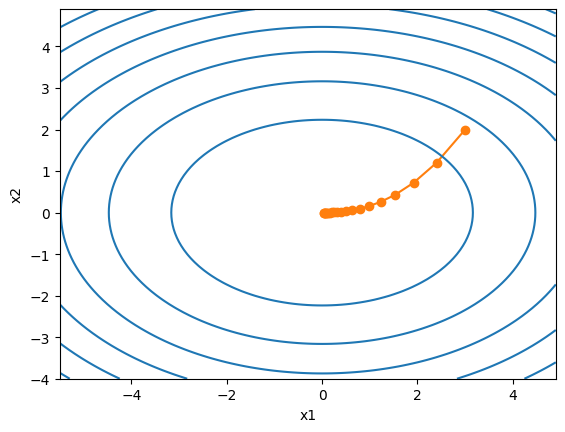

In [ ]:
x1, x2 = 3, 2
results = [(x1, x2)]
for i in range(steps):
  x1, x2 = gd_2d(x1, x2, eta)
  results.append((x1, x2))
print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')

show_trace_2d(f_2d, results)